From https://www.tensorflow.org/tutorials/images/cnn

In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
import matplotlib.pyplot as plt

Download and prepare CIFAR 10 dataset

In [3]:
(train_images_i, train_labels_i), (test_images_i, test_labels_i) = datasets.cifar10.load_data()

Normalize pixel values to [0, 1]

In [4]:
train_images_i, test_images_i = train_images_i/255.0, test_images_i/255.

Get the cats and dog images only

In [5]:
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def extract_model_data(images_i, labels_i):
    images = []
    labels = []

    for elem_image, elem_label in zip(images_i, labels_i):
        if elem_label[0] == 3 or elem_label[0] == 5:
            images.append(elem_image)
            if elem_label[0] == 3:
                labels.append(0)
            else:
                labels.append(1)
                
    return images, labels

In [6]:
train_images, train_labels = extract_model_data(train_images_i, train_labels_i)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
test_images, test_labels = extract_model_data(test_images_i, test_labels_i)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Verify the data

In [8]:
class_names = ['cat', 'dog']

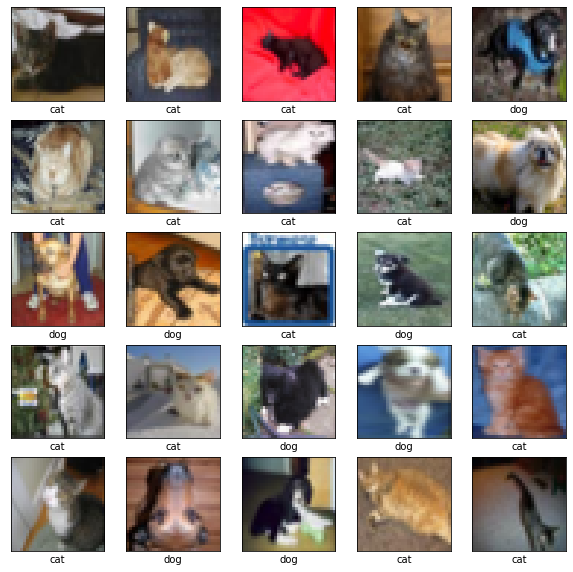

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

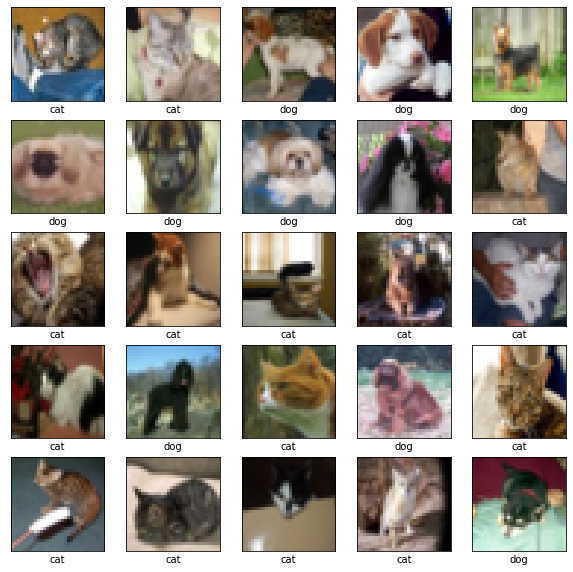

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

Convolutional base

In [11]:
model = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(20, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.Conv2D(20, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.MaxPool2D(),
    layers.Conv2D(50, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.Conv2D(50, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    layers.Conv2D(100, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.Conv2D(100, 3, padding = "same", activation = tf.keras.activations.relu),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(units=10, activation=tf.keras.activations.relu),
    layers.Dense(units=2, activation=tf.keras.activations.sigmoid)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        9050      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 50)        22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 50)          2

Compile and train the model

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [14]:
history = model.fit(train_images, train_labels, epochs=20,
                   validation_data=(test_images, test_labels)
                   )

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.6830 - sparse_categorical_accuracy: 0.5780 - val_loss: 0.6946 - val_sparse_categorical_accuracy: 0.5355
Epoch 2/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.6540 - sparse_categorical_accuracy: 0.6242 - val_loss: 0.6509 - val_sparse_categorical_accuracy: 0.6175
Epoch 3/20
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.6027 - sparse_categorical_accuracy: 0.6725 - val_loss: 0.5761 - val_sparse_categorical_accuracy: 0.7015
Epoch 4/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.5573 - sparse_categorical_accuracy: 0.7096 - val_loss: 0.5350 - val_sparse_categorical_accuracy: 0.7300
Epoch 5/20
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.5129 - sparse_categorical_accuracy: 0.7387 - val_loss: 0.5120 - val_sparse_categorical_accuracy: 0.7485
Epoch 6/20
10000

Evaluate the model

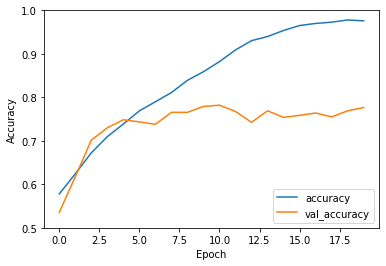

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

2000/2000 - 1s - loss: 0.9579 - sparse_categorical_accuracy: 0.7765
